# Исследование рынка недвижимости

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта,ближайшего парка и водоёма.

**Цель исследования** - установить параметры для автоматического определения рыночной стоимости объектов недвижимости.
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

**Ход исследования**
Данные о платежеспособности клиентов мы получили из файла `real_estate_data.csv`. О качестве данных нам ничего неизвестно, поэтому перед проведением исследования понадобится обзор данных.

Мы проверим данные на ошибки и оценим их влияние на исследование, затем, на этапе предобработки мы поищем возможность исправить самые критичные ошибки данных.

Затем мы рассчитаем недостающие показатели для таблицы и добавим новые столбцы.

С помощью перекрестных таблиц мы оценим влияние различных факторов на цену недвижимости. 

Таким образом, решение пройдет в четыре этапа:

## Обзор данных

Составим представление о данных. Импортируем специальную библиотеку pandas для обработки и анализа данных. 

In [1]:
import pandas as pd # импорт библиотеки pandas
import matplotlib.pyplot as plt # импорт части библиотеки matplotlib
import seaborn as sb # импорт библиотеки seaborn
import re # импорт библиотеки re для работы с регулярными выражениями

Прочитаем файл `real_estate_data.csv` и сохраним его в переменной `df`:

In [2]:
# чтение файла с данными и сохранение в df
try:
    # адрес в локальном окружении
    df = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    # адрес в среде 'practicum'
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  

Выведем на экран первые десять строк таблицы

In [3]:
display(df.head(10)) # получение первых 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Получим общую информацию о таблице

In [4]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца. 

Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м), тип данных - float64;
* `balcony` — число балконов, тип данных - float64;
* `ceiling_height` — высота потолков (м), тип данных - float64;
* `cityCenters_nearest` — расстояние до центра города (м), тип данных - float64;
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия), тип данных - float64;
* `first_day_exposition` — дата публикации, тип данных - object;
* `floor` — этаж, тип данных - int64;
* `floors_total` — всего этажей в доме, тип данных - float64;
* `is_apartment` — апартаменты (булев тип), тип данных - object;
* `kitchen_area` — площадь кухни в квадратных метрах (м²), тип данных - float64;
* `last_price` — цена на момент снятия с публикации, тип данных - float64;
* `living_area` — жилая площадь в квадратных метрах (м²), тип данных - float64;
* `locality_name` — название населённого пункта , тип данных - object;
* `open_plan` — свободная планировка (булев тип), тип данных - bool;
* `parks_around3000` — число парков в радиусе 3 км, тип данных - float64;
* `parks_nearest` — расстояние до ближайшего парка (м), тип данных - float64;
* `ponds_around3000` — число водоёмов в радиусе 3 км, тип данных - float64;
* `ponds_nearest` — расстояние до ближайшего водоёма (м), тип данных - float64;
* `rooms` — число комнат, тип данных - int64;
* `studio` — квартира-студия (булев тип), тип данных - bool;
* `total_area` — площадь квартиры в квадратных метрах (м²), тип данных - float64;
* `total_images` — число фотографий квартиры в объявлении, тип данных - int64;

Пояснение: апартаменты — это нежилые помещения, которые не относятся к жилому фонду, но имеют необходимые условия для проживания.

В названиях колонок нет нарушений. Однако некоторые типы данных не соответствуют описанию - например, количество балконов и апартаменты. Нужно будет их проверить и при необходимости привести к нужному типу. 

Количество значений в столбцах различается. Значит, есть пропущенные значения. 

**Выводы**

В каждой строке таблицы - данные об объявлении. Часит столбов заполнена пользователем, другая - сгенерирована автоматически на основе картографических данных. 

Для достижения нашей цели необходимо подготовить еще ряд столбцов с недостающей информацией, а также решить вопрос неполноты данных и убедиться в качестве данных. 

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

Исключим пропуски данных и дубликаты, проверим данные на наличие аномалий и избавимся от них. 
Приведем данные к необходимым типам.

### Заполнение пропусков

В некоторых столбцах есть приопущенные значения. Оценим их количество. 

In [5]:
df.isna().sum()# подсчёт количества пропусков.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Итак, пропуски есть в 13 столбцах. Отсортируем столбцы, чтобы понять, где пропусков больше всего.

In [6]:
df.isna().mean().sort_values(ascending=False)# расчет доли и сортировка по убыванию количества пропусков.

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
cityCenters_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

 Причем в ряде случаев пропусков больше половины: в столбцах ponds_nearest, parks_nearest, is_apartment. Больше 20% пропусков - в столбцах cityCenters_nearest, ceiling_height, airports_nearest, parks_around3000, ponds_around3000. 
Значительная часть пропущенных значений связана с данными, полученными от картографического сервиса, поэтому необходимо рассмотреть эти данные подробнее. 

Мы отсортировали столбцы по количеству пропусков. Теперь мы можем по очереди обработать их.
Сначала рассмотим картографические данные, затем - данные, вносимые пользователем. 
Начнем со столбца is_apartment.

###### is_apartment - заполнение пропусков

In [7]:
# просмотр 5 первых строк с пропущенными значениями в поле is_apartment
display(df[df['is_apartment'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропущенные значения в этом столбце не связано с другими пропусками и типом населенного пункта. Посмотрим, какие вообще есть значения в данном столбце.

In [8]:
# Просмотр значений в столбце 'is_apartment'
df['is_apartment'].value_counts(normalize=True) # параметр normalize позволяет определить долю значений  

False    0.981982
True     0.018018
Name: is_apartment, dtype: float64

Итак, доля апартаментов не превышает 2 процентов. Посмотрим, есть ли какие-то особенности у таких квартир.

In [9]:
df[df['is_apartment'] == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.6,2018-11-06T00:00:00,2,3.50,3.0,29.4,1,True,...,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.0,2018-01-11T00:00:00,2,3.12,3.0,40.0,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.8,2014-12-09T00:00:00,2,NaN,6.0,58.3,5,True,...,20.0,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.1,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.0,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0


Значения идут не подряд, закономерности в отношении населенного пункта и других параметров установить не представляется возможным. Поэтому логичным будет предположить, что те квартиры, по которым пропущены значения в этом столбце не относятся к апартаментам. Заполним отсутствующие значения значением False. 

In [10]:
# Заполнение пропущенных значений с помощью метода fillna()
df['is_apartment'] = df['is_apartment'].fillna(False)
# Проверка на отсутствие пропущенных значений
is_apartment_isna = df['is_apartment'].isna().sum()
print(f'Количество строк, где пропущены значения в столбцe \'is_apartment\' - {is_apartment_isna}')

Количество строк, где пропущены значения в столбцe 'is_apartment' - 0


###### parks_nearest,  ponds_nearest, parks_around3000, ponds_around3000 - заполнение пропусков

Проверим отсутствующие значения в столбце parks_nearest - расстояние до ближайшего парка непосредственно в датасете.

In [11]:
# просмотр 5 первых строк с пропущенными значениями в поле 'parks_nearest'
display(df[df['parks_nearest'].isna()].head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0


Похоже, что в столбцах parks_nearest,  ponds_nearest отсутствуют значения, если на расстоянии 3 километров отсутсвуют парки или пруды соответственно. Проверим гипотезу - рассчитаем максимальное значение расстояния до парка в зависимости от количества парков в округе. 

In [12]:
# расчет перекрестных таблиц по столбцам 'parks_nearest' и 'parks_around3000'
df_pivot_parks = df.pivot_table(values='parks_nearest', index='parks_around3000', aggfunc=max, dropna=False)
display(df_pivot_parks)

# расчет перекрестных таблиц по столбцам 'ponds_nearest' и 'ponds_around3000'
df_pivot_ponds = df.pivot_table(values='ponds_nearest', index='ponds_around3000', aggfunc=max,dropna=False) 
display(df_pivot_ponds)

,parks_nearest
parks_around3000,
0.0,3190.0
1.0,2984.0
2.0,2747.0
3.0,700.0


,ponds_nearest
ponds_around3000,
0.0,NaN
1.0,1344.0
2.0,1096.0
3.0,950.0


Действительно, в случае отсутствия прудов и парков в зоне трех километров информации о расстоянии до ближайшего пруда нет. В случае парков - есть информация о нескольких парках чуть дальше 3 километров. 

И тогда, например, если мы заменим информацию о прудах на 0, то средние значения будут уменьшаться. Лучше заменить расстояние до ближайших пруда и парков на 4000 метров - это на 1000 метров выше нашего лимита.  

In [13]:
# Поиск и замена пропущенных значений в столбце 'parks_nearest' на значение выше лимита.
df.loc[df['parks_around3000'] == 0, 'parks_nearest'] = (
    df.loc[df['parks_around3000'] == 0, 'parks_nearest'].fillna(4000)
)
# Просмотр имеющихся значений в данной категории
df.loc[df['parks_around3000'] == 0, 'parks_nearest'].value_counts()

4000.0    10102
3190.0        2
3013.0        1
3064.0        1
Name: parks_nearest, dtype: int64

Аналогичным образом заменим информацию о ближайших прудах.

In [14]:
# Поиск и замена пропущенных значений  в столбце 'ponds_nearest' на значение выше лимита.
df.loc[df['ponds_around3000'] == 0, 'ponds_nearest'] = (
    df.loc[df['ponds_around3000'] == 0, 'ponds_nearest'].fillna(4000)
)
# Просмотр имеющихся значений в данной категории
df.loc[df['ponds_around3000'] == 0, 'ponds_nearest'].value_counts()

4000.0    9071
Name: ponds_nearest, dtype: int64

Все значения были пропущены, поэтому 4000 метров - единственное значение в расстоянии до ближайшего пруда при отсутствии прудов в радиусе 3000 метров.

Обратимся к пропущенным значениям в столбцах parks_around3000 и ponds_around3000.

In [15]:
print('Количество парков в 3 километрах\n', df['parks_around3000'].value_counts())
print('Нет данных о', df['parks_around3000'].isna().sum())
print()
print('Количество прудов в 3 километрах\n', df['ponds_around3000'].value_counts())
print('Нет данных о', df['ponds_around3000'].isna().sum())

Количество парков в 3 километрах
 0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64
Нет данных о 5518

Количество прудов в 3 километрах
 0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64
Нет данных о 5518


Предположим, что отсутствие информации связано с типом населенного пункта: о селах, деревнях и поселках сложнее  найти информаию, чем о Санкт-Петербурге и  других крупных городах.  Посмотрим, какие населенные пункты встречаются в наших данных.

In [16]:
# Получение количество уникальных значений помощью метода nunique() 
print('Всего в данных уникальных населенных пунктов',  df['locality_name'].nunique())

# 
print('Названия населенных пунктов')
df['locality_name'].sort_values().unique()

Всего в данных уникальных населенных пунктов 364
Названия населенных пунктов


array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Достаточно большое количество населенных пунктов имеет в названии указание типа. С этим мы будем работать при устранении дубликатов. Пока просто подсчитаем примерно количество пропущенных значений в таких населенных пунктах. 

In [17]:
# Поиск с помощью метода .str.match всех совпадений в названии с малым населенным пунктом
# (село, поселок, деревня и садовое товарищество)
sum_na=(
    df.loc[df['locality_name'].str.match('.*село*') ==True, 'ponds_around3000'].isna().count() +
    df.loc[df['locality_name'].str.match('.*пос.лок*') ==True, 'ponds_around3000'].isna().count() + 
    df.loc[df['locality_name'].str.match('.*деревня*') ==True, 'ponds_around3000'].isna().count() +
    df.loc[df['locality_name'].str.match('.*садово*') ==True, 'ponds_around3000'].isna().count() 
)
print('Количество пропущенных значений в столбце \'ponds_around3000\' в малых населенных пунктах', sum_na)

Количество пропущенных значений в столбце 'ponds_around3000' в малых населенных пунктах 4281


Значительная доля пропущенных значений приходится на малые населенные пункты. На самом деле в малых населенных пунктах обычно есть и водоемы и парки, поэтому заменять на 0 не приходится. Примем за данность, что в малых населенных пунктах есть 1 парк и 1 пруд на расстоянии до 3 километров, а расстояния до них заменим на медианные значения по массиву. 

In [18]:
# Заполнение пропущенных значений с помощью метода fillna()
df['ponds_around3000'] = df['ponds_around3000'].fillna(1)
df['parks_around3000'] = df['parks_around3000'].fillna(1)

df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())
df['parks_nearest'] = df['parks_nearest'].fillna(df['parks_nearest'].median())


df.isna().sum()
#df['total_income'] = df['total_income'].fillna(df.groupby('income_type')['total_income'].transform('median'))# Проверка на отсутствие пропущенных значений\n",
 #   "total_income_isna = df['total_income'].isna().sum()\n"

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest               0
days_exposition          3181
dtype: int64

   ###### total_area - обработка аномалий

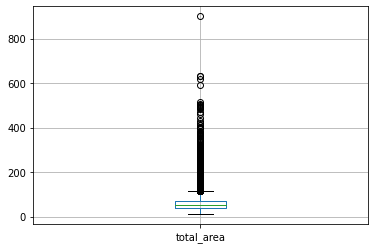

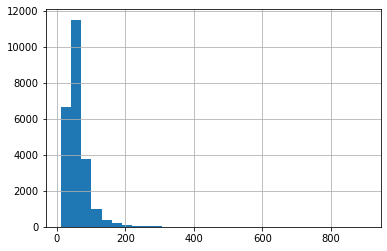

In [19]:
df.boxplot(column='total_area')
plt.show()
df['total_area'].hist(bins=30)
plt.show()

Диаграмма имеет длинный хвост. Аналогичная ситуация на диаграмме "ящик с усами". По форме распределение напоминает распределение Пуассона, но необходимо убрать слишком большие значения - свыше 140.

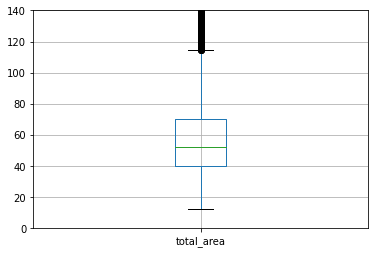

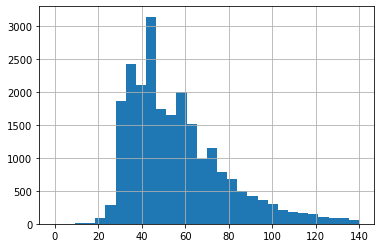

In [20]:
df.boxplot(column='total_area')
plt.ylim(0, 140)
plt.show()
df['total_area'].hist(bins=30, range = (0, 140))
plt.show()

В данных все равно встречается достаточно много предложений выше третьего квартиля, однако само распределение уже имеет более правильную форму. Удалим по квартирам площадью свыше 140 метров из массива.

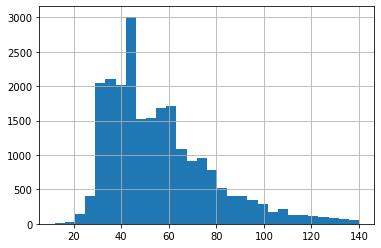

In [21]:
# Удаление всех строк со значением total_area свыше 140 метров
df = df.query('total_area <= 140')
# Проверка: 
df['total_area'].hist(bins=30)
plt.show()

###### airports_nearest, cityCenters_nearest - заполнение пропусков

Другие отсутствующие значения в картографических данных - расстояние до центра города и аэропорта. Видимо, картографические данные были не полными и не охватили все населенные пункты. Мы можем попробовать восполнить отсутсвующие данные по расстоянию до аэропорта проверив, есть ли информация по этим населенным пунктам.

In [22]:
df['airports_nearest'] = df['airports_nearest'].fillna(df.groupby('locality_name')['airports_nearest'].transform('median'))
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df.groupby('locality_name')['cityCenters_nearest'].transform('median'))

# Проверка на уменьшение количества пропущенных значений,
df['airports_nearest'].isna().sum()
df['cityCenters_nearest'].isna().sum()

5383

Точная коррекция помогла нам в небольшом количестве случаев. Остальные данные придется восполнить при помощи медианы по всему массиву.

In [23]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())
df['airports_nearest'].isna().sum()

0

Аналогичную операцию проведем с данными по близости к центру.

In [24]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())
df['cityCenters_nearest'].isna().sum()

0

Таким образом, все пропуски в картографических данных обработаны. Перейдем к данным, вводимым пользователями.

###### balcony - заполнение пропусков

В столбце balcony большое количество пропусков. Кроме того тип данных - float64 не соответствует описанию - количество балконов измеряется в целых чилах, больше бы подошел формат int64. Запросим имеющиеся значения данных.

In [25]:
df['balcony'].value_counts()

1.0    4085
2.0    3629
0.0    3624
5.0     289
4.0     171
3.0      75
Name: balcony, dtype: int64

Итак, формат данных не соответстует необходимому - в столбце содержатся целые числа. С этим мы разберемся позднее.
А наличие значений больше 2 скорее всего техническая ошибка - вместо количества балконов пользователь мог указать его площадь. В этом случае необходимо значение заменить на 1. 

In [26]:
df.loc[df['balcony']>2, 'balcony'] = 1
df['balcony'].value_counts()

1.0    4620
2.0    3629
0.0    3624
Name: balcony, dtype: int64

Теперь распределение соответствует действительности. Логично предположить, что в объявлениях, где не указано, что балкон есть балкон отсутствует. Заменим пропущенные значения на 0.

In [27]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

######  floors_total- заполнение пропусков

Пропуски в количестве этажей заменим на этаж, на котором находится квартира.

In [28]:
df['floors_total'] = df['floors_total'].fillna(df['floor'])
df['floors_total'].isna().sum()

0

###### ceiling_height - заполнение пропусков

Достаточно большое количество пропусков в столбце ceiling_height. Рассмотрим описание данных.

In [29]:
df['ceiling_height'].describe()

count    14024.000000
mean         2.755844
std          1.276818
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Несмотря на то, что среднее значение выглядит реалистично, встречаются потолки от 1 метра до 100 метров, что говорит об аномалиях в данных. Рассмотрим квартиры с потолками меньше 2 метров. 

In [30]:
df.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14T00:00:00,2,1.20,2.0,27.5,1,False,...,5.20,0.0,городской посёлок Мга,26960.0,13263.0,1.0,4000.0,1.0,1255.0,248.0
16934,5,4100000.0,40.0,2017-10-17T00:00:00,1,1.75,37.0,17.4,5,False,...,8.34,0.0,Санкт-Петербург,18732.0,20444.0,0.0,4000.0,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31T00:00:00,2,1.00,12.0,32.4,7,False,...,10.00,0.0,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Предложения выглядят малореалистично. Уберем их из нашей базы данных, чтобы они не влияли на расчеты.

In [31]:
df.drop(df[df.ceiling_height < 2].index, inplace=True)

In [32]:
df.query('ceiling_height < 2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Теперь обратимся к высоким потолкам. Санкт-Петербург - город с исторической застройкой, поэтому редкие квартиры с потолками в 5, 6 и даже 8 метров могут встречаться (но не в высотных жилых домах).

<AxesSubplot:>

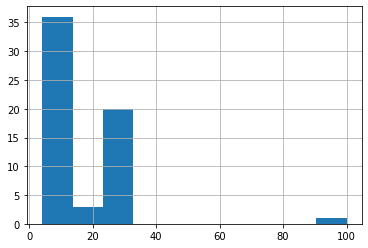

In [33]:
df.loc[df['ceiling_height'] > 4, 'ceiling_height'].hist()

Скорее всего, значения в интервале от 20 до 40 - результат технической ошибки. На самом деле потолки в тех квартирах в 10 раз ниже. Заменим значения. 

In [34]:
df.loc[(df['ceiling_height'] >= 20)  & (df['ceiling_height'] < 40), 'ceiling_height'] = (
    df.loc[(df['ceiling_height'] >= 20)  & (df['ceiling_height'] < 40), 'ceiling_height']/10
)

In [35]:
df.loc[df['ceiling_height'] > 3.5].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
154,1,8200000.0,80.0,2018-11-06T00:00:00,3,4.15,3.0,44.20,2,False,...,12.2,0.0,Санкт-Петербург,20562.0,3167.0,2.0,344.0,1.0,838.0,38.0
179,5,14800000.0,108.7,2019-04-11T00:00:00,3,4.00,5.0,72.40,5,False,...,8.0,0.0,Санкт-Петербург,23017.0,2559.0,1.0,559.0,0.0,4000.0,NaN
368,19,12500000.0,85.0,2018-09-21T00:00:00,3,3.70,6.0,56.50,6,False,...,22.0,0.0,Санкт-Петербург,27084.0,5777.0,2.0,516.0,1.0,36.0,4.0
635,17,25990000.0,133.9,2018-03-16T00:00:00,4,3.60,3.0,74.99,3,False,...,19.2,0.0,Санкт-Петербург,23843.0,2391.0,0.0,4000.0,3.0,418.0,NaN
797,1,7500800.0,105.2,2017-09-08T00:00:00,3,3.80,5.0,62.60,2,False,...,19.2,0.0,Санкт-Петербург,24705.0,4924.0,2.0,521.0,0.0,4000.0,79.0
836,20,13500000.0,78.7,2016-04-13T00:00:00,3,3.55,6.0,59.60,3,False,...,8.0,0.0,Санкт-Петербург,23390.0,2254.0,2.0,425.0,1.0,62.0,143.0
885,9,8200000.0,96.0,2018-07-23T00:00:00,3,3.62,3.0,61.60,3,False,...,8.5,0.0,Кронштадт,69690.0,51415.0,3.0,87.0,3.0,412.0,NaN
1003,8,9000000.0,85.0,2017-08-07T00:00:00,3,3.80,5.0,52.00,4,False,...,6.0,0.0,Санкт-Петербург,26352.0,5200.0,2.0,170.0,1.0,1036.0,219.0
1043,9,9250000.0,96.0,2017-06-22T00:00:00,3,3.80,4.0,68.00,3,False,...,11.0,0.0,Санкт-Петербург,22628.0,2169.0,1.0,655.0,0.0,4000.0,480.0
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.00,3.0,NaN,1,False,...,NaN,0.0,Бокситогорск,26960.0,13263.0,1.0,4000.0,1.0,1255.0,6.0


Данные с очевидной технической ошибкой мы трансформировали. остальные выглядят реалистично.

Теперь заполним пропуски в данных, сначала медианным значением по количеству этажей, затем - стандартнрой высотой в 2.4 метра - это минимальная высота потолка в жилых помещениях по современным санитарным нормам.

In [36]:
df['ceiling_height'] = df['ceiling_height'].fillna(df.groupby('floors_total')['ceiling_height'].transform('median'))
df['ceiling_height'] = df['ceiling_height'].fillna(2.4)
df['ceiling_height'].isna().sum()

0

Теперь пропущенные значения в этом столбце отсутствуют. Перейдем к пропущенным значениям в столбце days_exposition.

######  days_exposition, locality_name  - заполнение пропусков

In [37]:
df.loc[df['days_exposition'].isna(), 'first_day_exposition'].sort_values()

3873     2014-11-27T00:00:00
3291     2014-11-27T00:00:00
6922     2014-12-08T00:00:00
15614    2014-12-09T00:00:00
16327    2014-12-09T00:00:00
                ...         
2178     2019-05-03T00:00:00
4450     2019-05-03T00:00:00
10917    2019-05-03T00:00:00
12343    2019-05-03T00:00:00
14246    2019-05-03T00:00:00
Name: first_day_exposition, Length: 2999, dtype: object

Всего пропущенных значений 3181, это достаточно много. Причем есть объявления и от 2014 года и до 2019. Этот показатель нам важен для анализа того, как быстро продаются квартиры. Если невозможно рассчитать время продажи, то остальные данные не имеют смысла. Удалим из массива.

In [38]:
df = df[df['days_exposition'].notna()]
df['days_exposition'].isna().sum()

0

Мы убедились, что в столбце days_exposition пропущенных значений не осталось. Теперь удалим пропущенные значения из столбца locality_name. Их всего 48 и они также важны для анализа скорости продажи квартир.

In [39]:
df = df[df['locality_name'].notna()]
df['locality_name'].isna().sum()

0

Теперь пропусков в данных о населенном пункте не осталось.

######  living_area, kitchen_area - заполнение пропусков

Теперь обратимся к параметрам  living_area и kitchen_area. Из описания данных не понятно, как рассчитывается жилая площадь во всем жилье, а также площадь кухни в квартирах-студиях.
В реальном исследовании следовало бы обратиться к представителям бизнеса для понимания, как рассчитываются показатели. 
Начнем с площади кухни в квартирах студиях. 

In [40]:
df.loc[df['studio'] == True,['living_area', 'kitchen_area', 'locality_name', 'studio']]

,living_area,kitchen_area,locality_name,studio
144,15.50,NaN,посёлок Мурино,True
440,24.75,NaN,Санкт-Петербург,True
608,NaN,NaN,посёлок Шушары,True
697,17.50,NaN,деревня Кудрово,True
716,12.00,NaN,посёлок Шушары,True
...,...,...,...,...
22867,18.20,NaN,Санкт-Петербург,True
22877,18.00,NaN,Санкт-Петербург,True
23210,18.00,NaN,Санкт-Петербург,True
23554,NaN,NaN,Санкт-Петербург,True


Как мы и предполагали, данных о площади кухни в квартирах студиях отстутствуют. 
На этом этапе следовало бы ввести правило о том, как мы ее рассчитываем. Можно предложить 2 варианта: 0 метров, так как отдельной кухни в студиях нет или принять ее за половину жилой площади в таких квартирах.
Выберем второй вариант.

In [41]:
def transform_kitchen_area(row):
    if row.studio == True:
        
        return row.living_area / 2
    return row.kitchen_area
    
df['kitchen_area'] = df.apply(lambda row : transform_kitchen_area(row), axis=1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,4000.0,0.0,4000.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,9.1,0.0,городской посёлок Янино-1,26960.0,13263.0,1.0,4000.0,1.0,1255.0,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.65,26.0,10.6,6,False,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,4000.0,0.0,4000.0,155.0


В остальных случаях заменим отсутствующую информацию о жилой площади и площади кухни медианной по населенному пункту. Только будем использовать не абсолютное значение - для квартир разной площади это не актуально, а отношение общей площади к жилой и кухне соответственно.

In [42]:
df.living_area.isna().sum()

df['living_share'] = df.living_area / df.total_area
df['kitchen_share']= df.kitchen_area / df.total_area
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,4000.0,0.0,4000.0,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,городской посёлок Янино-1,26960.0,13263.0,1.0,4000.0,1.0,1255.0,55.0,0.473684,0.299342
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.65,26.0,10.6,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,4000.0,0.0,4000.0,155.0,0.284182,0.386059


In [43]:
df['living_area'] = df['living_area'].fillna((df.groupby('locality_name')['living_share'].transform('median'))*df['total_area'])# Проверка на отсутствие пропущенных значений\n",
df['kitchen_area'] = df['kitchen_area'].fillna((df.groupby('locality_name')['kitchen_share'].transform('median'))*df['total_area'])# Проверка на отсутствие пропущенных значений\n",


Мы заменили отсутствующие значения, если удалось найти медиану для конкретного населенного пункта. Для остальных произведем замену с помощью медианной доли по массиву.

In [44]:
median_living_share = df['living_share'].median()
median_kitchen_share = df['kitchen_share'].median()
print(f'Медиана доли жилой площади в общей площади {median_living_share:.2%}')
print(f'Медиана доли жилой площади в общей площади {median_kitchen_share:.2%}')

df['living_area'] = df['living_area'].fillna(median_living_share*df['total_area'])# Проверка на отсутствие пропущенных значений\n",
df['kitchen_area'] = df['kitchen_area'].fillna(median_kitchen_share*df['total_area'])# Проверка на отсутствие пропущенных значений\n",
df.head()

Медиана доли жилой площади в общей площади 56.47%
Медиана доли жилой площади в общей площади 17.73%


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,4000.0,0.0,4000.0,81.0,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500,0.148214
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.65,12.0,14.4,5,False,...,городской посёлок Янино-1,26960.0,13263.0,1.0,4000.0,1.0,1255.0,55.0,0.473684,0.299342
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.65,26.0,10.6,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,4000.0,0.0,4000.0,155.0,0.284182,0.386059


Таким образом мы заполнили все пропуски. Убедимся, что пропущенных значений не осталось.

In [45]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
living_share            1645
kitchen_share           1884
dtype: int64

Пропущенные значения остались в технических столбцах living_share и kitchen_share. Если бы эти данные нам не были нужны, мы могли бы просто удалить данные колонки. Однако они нам еще могут пригодиться в нашем анализе. Поэтому просто рассчитаем отсутствующие значения.

In [46]:
df.loc[df['living_share'].isna(), 'living_share'] = df['living_area'] / df['total_area']
df.loc[df['kitchen_share'].isna(), 'kitchen_share'] = df['kitchen_area'] / df['total_area']
df.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
living_share            0
kitchen_share           0
dtype: int64

Мы заполнили пропуски в большинстве столбцов с информацией, введенной пользователем и взятой из картографических данных. Мы решили заполнить пропуски именно в этих столбцах, потому что:
* данные были в числовом формате, возможно было рассчитать медианы, среднее, максимум, для того чтобы выбрать замену пропущенных значений,
* было достаточно данных для заполнения пропусков - доля пропусков была значительно меньше доли полных данных,
* в некоторых случаях можно было заменить пропуски в данных на 0 (как в случаях с балконами), то есть заполнить пропуски по смыслу. 
Не стали заменять мы пропуски в столбцах с названием населенного пункта и сроком размещения объявления - эти данные ключевые для нашего анализа, мы не можем их сконструировать. Данные с пропусками в этих столбцах были убраны из анализа. 
Пропуски в столбце 'апартаменты' мы заменили на 'False', так как большинство квартир относится к жилому фонду, а владельцы апартаментов склонны это явно указывать. 
Данные картографического характера мы заполняли с использованием медианного значения, так как оно менее чувствительно к выбросам.
Среди источников причин, которые могли привести к пропускам в данных, можно назвать следующие:
* пользовательские - пользователь мог ввести данные с ошибками, пропустить информацию в некоторых полях,
* партнерские сервисы - картографические данные в нашей таблице могли быть неполными, не по всем населенным пунктам,
* технические - могли быть ошибки при копировании и сохранении данных, сама форма подачи объявлений могла меняться, в связи с этим некоторые поля могли быть недоступны в ранних версиях.

### Проверка данных на аномалии и исправления

Проверим данные на аномалии. Сначала - оценим общую картину с помощью метода describe. Так мы увидим количество значений, минимальное и максиальное значение по столбцам и некоторые другие сведения.

In [47]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share
count,19956.000000,1.995600e+04,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000,19956.000000
mean,9.578473,5.418787e+06,55.097812,1.953698,2.697703,10.931249,31.396676,6.002706,9.978897,0.521848,28522.412808,14277.328523,0.680096,2843.957106,0.801213,2054.599118,177.451944,0.562355,0.190875
std,5.617848,3.971596e+06,21.446127,0.926981,0.729463,6.664971,14.435400,4.955365,4.544445,0.755618,11355.204857,7516.090808,0.708602,1660.228975,0.812099,1593.757075,216.560120,0.101040,0.070082
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.021583,0.043478
25%,6.000000,3.360000e+06,39.000000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,20850.500000,11276.000000,0.000000,622.000000,0.000000,651.000000,44.000000,0.498401,0.140202
50%,9.000000,4.499000e+06,50.000000,2.000000,2.650000,9.000000,29.500000,4.000000,9.000000,0.000000,26960.000000,13263.000000,1.000000,4000.000000,1.000000,1255.000000,93.000000,0.565622,0.175620
75%,13.000000,6.300000e+06,66.000000,3.000000,2.750000,16.000000,40.000000,8.000000,11.415289,1.000000,35068.000000,15500.250000,1.000000,4000.000000,1.000000,4000.000000,225.000000,0.629481,0.233333
max,50.000000,1.240000e+08,140.000000,7.000000,100.000000,60.000000,118.500000,33.000000,64.000000,2.000000,84869.000000,65968.000000,3.000000,4000.000000,3.000000,4000.000000,1580.000000,1.000000,0.787879


Рассмотрим аномалии в данных. 
Судя по максимальному, минимальному, среднему значению и медиане особых аномалий нет столбцах total_images, , balcony, а также картографической информации. Столбец ceiling_height мы обработали при анализе отсутствующих значений.

Следующие столбцы важны для анализа и содержат аномалии: last_price, total_area, rooms, floors_total, living_area, floor, kitchen_area, days_exposition. 
Построим по этим столбцам диаграмму "ящик с усами" и обработаем аномальные значения.

   ###### last_price - обработка аномалий

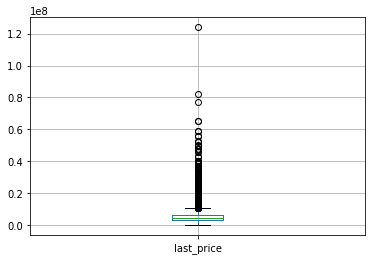

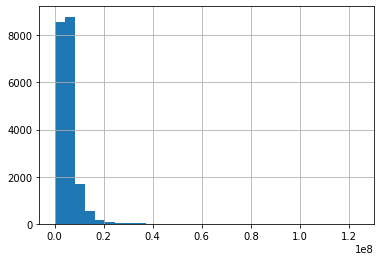

In [48]:
df.boxplot(column='last_price')
plt.show()
df['last_price'].hist(bins=30)
plt.show()

Диаграмма имеет длинный хвост. Аналогичная ситуация на диаграмме "ящик с усами". По форме распределение напоминает распределение Пуассона, но необходимо убрать слишком большие значения - определим высшую границу в 13 000 000.

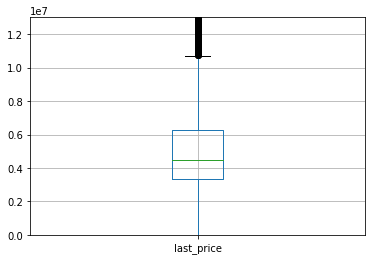

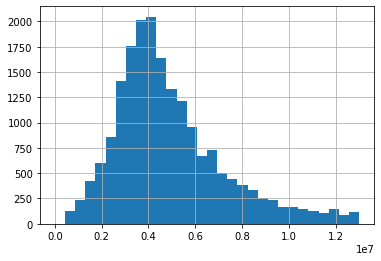

In [49]:
df.boxplot(column='last_price')
plt.ylim(0, 13_000_000)
plt.show()
df['last_price'].hist(bins=30, range = (0, 13_000_000))
plt.show()

В данных все равно встречается достаточно много предложений выше третьего квартиля, однако само распределение уже имеет более правильную форму. Удалим данные по квартирам свыше 13 000 000 из массива.

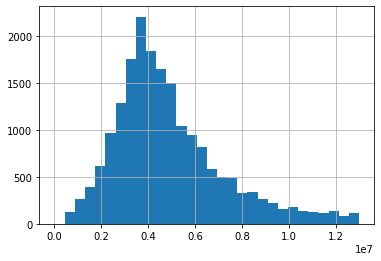

In [50]:
# Удаление всех строк со значением total_area свыше 140 метров
df = df.query('last_price <= 13_000_000')
df.reset_index(inplace=True)
# Проверка: 
df['last_price'].hist(bins=30)
plt.show()

   ###### total_area - обработка аномалий

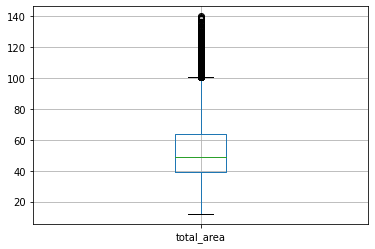

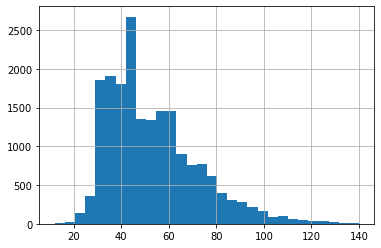

In [51]:
df.boxplot(column='total_area')
plt.show()
df['total_area'].hist(bins=30)
plt.show()

Диаграмма имеет длинный хвост. Аналогичная ситуация на диаграмме "ящик с усами". По форме распределение напоминает распределение Пуассона, но необходимо убрать слишком большие значения - свыше 140.

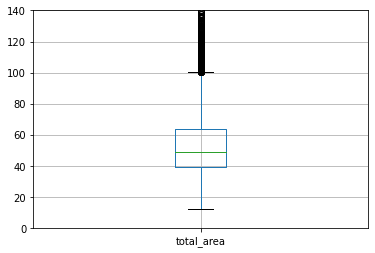

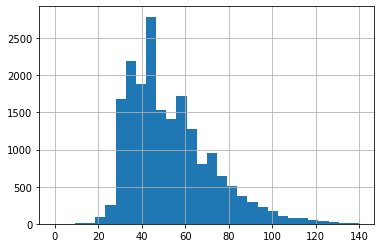

In [52]:
df.boxplot(column='total_area')
plt.ylim(0, 140)
plt.show()
df['total_area'].hist(bins=30, range = (0, 140))
plt.show()

В данных все равно встречается достаточно много предложений выше третьего квартиля, однако само распределение уже имеет более правильную форму. Удалим по квартирам площадью свыше 140 метров из массива.

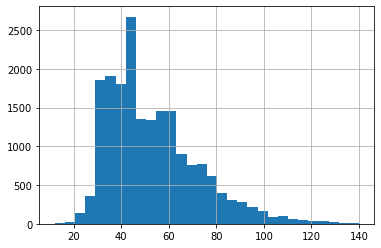

In [53]:
# Удаление всех строк со значением total_area свыше 140 метров
df = df.query('total_area <= 140')
# Проверка: 
df['total_area'].hist(bins=30)
plt.show()

   ###### living_share, kitchen_share - обработка аномалий

Аналогичным образом проверяем наличие аномалий в размере кухонной и жилой зоны. При анализе аномалий более адекватным будет анализ не абсолютной жилой и кухонной площади, а относительной, содержащейся в столбцах  living_share и kitchen_share.    

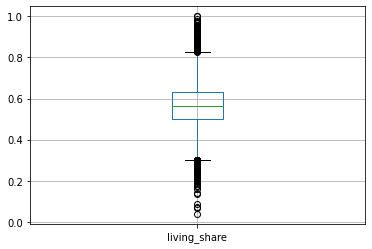

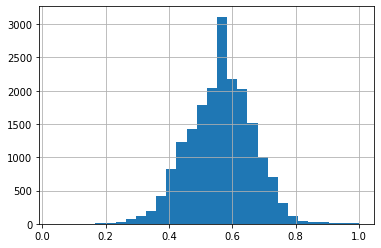

In [54]:
df.boxplot(column='living_share')
plt.show()
df['living_share'].hist(bins=30)
plt.show()

В целом распределение доли жилой площади походит на нормальное, однако есть квартиры со слишком большой и слишком маленькой долей жилой площади. В реальности нам нужно было бы посоветоваться с представителями бизнеса. Сейчас предложим правило сами: жилая площадь не может быть меньше 30% и больше 90% площади квартиры. Остальные квартиры удалим из анализа.

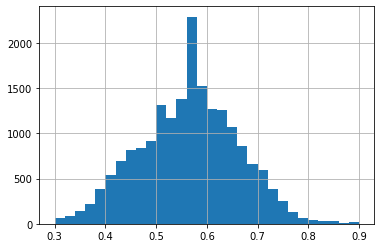

In [55]:
df = df.query('0.3 <= living_share <= 0.9')
df.reset_index(drop = True, inplace=True) # Обновление индексации
df['living_share'].hist(bins=30)
plt.show()

Теперь мы исключили квартиры с аномально высокой и низкой долей жилой площади и обратимся к анализу доли площади кухни.

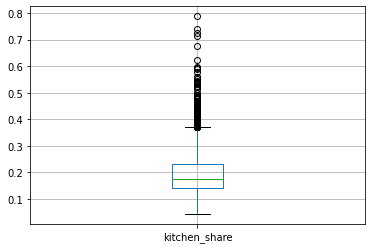

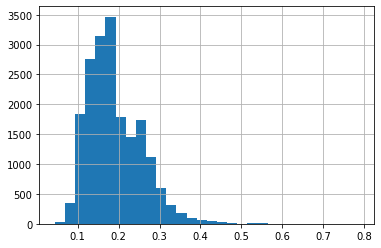

In [56]:
df.boxplot(column='kitchen_share')
plt.show()
df['kitchen_share'].hist(bins=30)
plt.show()

Распределение доли площади кухни походит на распределение Пуассона (кухни могут быть очень маленькими), однако также встречаются квартиры со слишком большой и слишком маленькой долей площади кухни. Предложим следующее правило: площадь кухни не может быть меньше 5% и больше 50% общей площади квартиры.

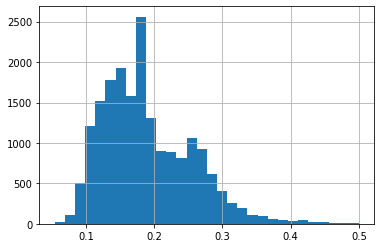

In [57]:
df = df.query('0.05 <= kitchen_share <= 0.5')
df.reset_index(drop = True, inplace=True) # Обновление индексации
df['kitchen_share'].hist(bins=30)
plt.show()

Теперь мы устранили квартиры с кухнями аномальных размеров. Перейдем к анализу следующих показателей.

###### rooms - обработка аномалий 

Переменная rooms - категориальная. Поэтому не будем рассматривать графики, а запросим распределение имеющихся значений. 

In [58]:
# Запрос имеющихся значений в столбце
df['rooms'].value_counts()

1    7110
2    6682
3    4301
4     662
0     173
5      99
6      11
7       1
Name: rooms, dtype: int64

Удалим из анализа те квартиры, в которых 0 комнат и те, где комнат 5 и более. 

In [59]:
# Запрос и удаление данных, относящихся к аномальным
df = df.query('0 < rooms < 5')
df.reset_index(drop = True, inplace=True) # Обновление индексации
# Проверка: запрос имеющихся значений в столбце
df['rooms'].value_counts()

1    7110
2    6682
3    4301
4     662
Name: rooms, dtype: int64

В данных остались только квартиры с часто встречающимся числом комнат.

###### floors_total, floor - обработка аномалий

Рассмотрим распределение домов по числу этажей

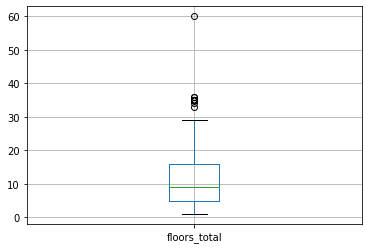

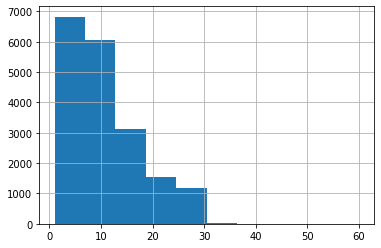

In [60]:
# Построение диаграммы "ящик с усами"
df.boxplot(column='floors_total')
plt.show() # Показ диаграммы

# Построение гистограммы
df['floors_total'].hist()
plt.show() # Показ диаграммы

Мы видим, что к аномальным значениям можно отнести дома с количеством этажей выше 30. Удалим их из данных для анализа.

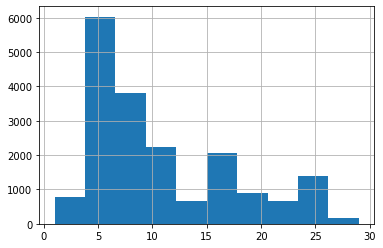

In [61]:
# Запрос и удаление данных, относящихся к аномальным
df = df.query('floors_total <= 30')
df.reset_index(drop = True, inplace=True) # Обновление индексации
# Построение гистограммы по получившимся данным
df['floors_total'].hist()
plt.show() # Показ гистограммы

Теперь в данных информация только по квартирам с типичным количеством этажей. Проверим перименную floor. Оценивать будем не ее границы, а случаи, когда этаж квартиры больше общего количества этажей в здании.

In [62]:
df.query('floors_total < floor')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share


Таких значений в таблице нет. Значит, можем продолжать анализ.

<a id='days_exposition_anomalies'></a>

###### days_exposition - обработка аномалий 

Рассмотрим распределение срока показа объявления. 

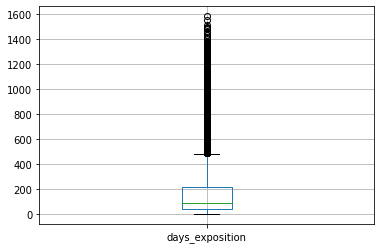

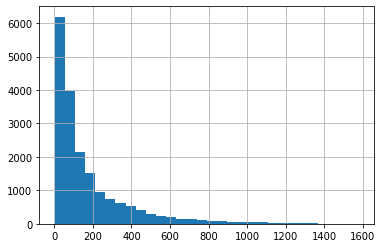

count    18734.000000
mean       173.989164
std        212.190504
min          1.000000
25%         44.000000
50%         92.000000
75%        220.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [63]:
# Построение диаграммы "ящик с усами"
df.boxplot(column='days_exposition')
plt.show() # Показ диаграммы

# Построение гистограммы
df['days_exposition'].hist(bins=30)
plt.show() # Показ диаграммы

df['days_exposition'].describe()

Мы видим, что форм распределения стремится к распределению Пуассона. Однако некоторые объявления демонстрируются слишком долгий срок. Примем за правило, что мы анализируем только объявления, со срокам показа до 1 года - 365 дней. Узнаем сколько объявлений не соответствует этому критерию.  

In [64]:
df.query('days_exposition > 365')['days_exposition'].count()

2625

Всего таких объявлений 2804. Удалим их из данных.

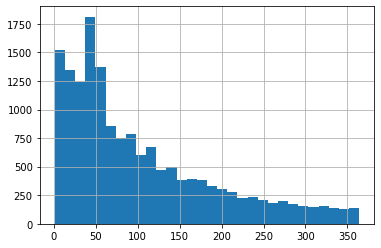

In [65]:
# Запрос и удаление данных, относящихся к аномальным
df = df.query('days_exposition < 365')
df.reset_index(drop = True, inplace=True) # Обновление индексации

# Построение гистограммы
df['days_exposition'].hist(bins=30)
plt.show() # Показ диаграммы

Теперь диаграмма не включает аномальные значения. Мы обработали все аномалии в таблице. Еще раз проверим все столбцы, запросив описание данных.

In [66]:
df.describe()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share
count,16109.000000,16109.000000,1.610900e+04,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000,16109.000000
mean,11866.225899,9.604569,4.825388e+06,52.574070,1.900677,2.676882,10.970638,29.993887,6.021789,9.465775,0.528214,28650.398535,14630.744367,0.657334,2900.989137,0.762803,2099.356012,103.241728,0.562592,0.189004
std,6806.527961,5.579021,2.266882e+06,18.139546,0.854191,0.225445,6.602881,12.553520,4.923044,3.607482,0.757400,11527.957549,7368.792364,0.689706,1639.100844,0.774351,1587.785707,88.815542,0.095359,0.063744
min,1.000000,0.000000,4.300000e+05,12.000000,1.000000,2.000000,1.000000,7.353089,1.000000,2.000000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.300000,0.059122
25%,5996.000000,6.000000,3.300000e+06,38.800000,1.000000,2.550000,5.000000,18.200000,2.000000,7.000000,0.000000,20548.000000,11764.000000,0.000000,646.000000,0.000000,693.000000,37.000000,0.500000,0.141304
50%,11857.000000,9.000000,4.342000e+06,48.200000,2.000000,2.650000,9.000000,29.000000,4.000000,9.000000,0.000000,26960.000000,13263.000000,1.000000,4000.000000,1.000000,1255.000000,72.000000,0.565622,0.175620
75%,17748.000000,13.000000,5.900000e+06,62.600000,3.000000,2.750000,16.000000,38.000000,8.000000,11.000000,1.000000,35353.000000,15653.000000,1.000000,4000.000000,1.000000,4000.000000,151.000000,0.627138,0.230971
max,23695.000000,50.000000,1.300000e+07,139.000000,4.000000,14.000000,29.000000,100.000000,27.000000,41.100000,2.000000,83758.000000,64857.000000,3.000000,4000.000000,3.000000,4000.000000,364.000000,0.899441,0.500000


Аномалий в данных не видно. Переходим к следующим шагам.

In [67]:
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share
0,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.60,1,...,посёлок Шушары,12817.0,18603.0,0.0,4000.0,0.0,4000.0,81.0,0.460396,0.272277
1,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000,0.410000
2,5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,...,городской посёлок Янино-1,26960.0,13263.0,1.0,4000.0,1.0,1255.0,55.0,0.473684,0.299342
3,8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,...,посёлок Мурино,26960.0,13263.0,1.0,4000.0,1.0,1255.0,189.0,0.465320,0.265682
4,9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,...,Санкт-Петербург,50898.0,15008.0,0.0,4000.0,0.0,4000.0,289.0,0.714754,0.106557


### Изменение типов данных.

Проанализируем типы и содержание данных.

In [68]:
# Запрос информации обо всех столбцах.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16109 entries, 0 to 16108
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 16109 non-null  int64  
 1   total_images          16109 non-null  int64  
 2   last_price            16109 non-null  float64
 3   total_area            16109 non-null  float64
 4   first_day_exposition  16109 non-null  object 
 5   rooms                 16109 non-null  int64  
 6   ceiling_height        16109 non-null  float64
 7   floors_total          16109 non-null  float64
 8   living_area           16109 non-null  float64
 9   floor                 16109 non-null  int64  
 10  is_apartment          16109 non-null  bool   
 11  studio                16109 non-null  bool   
 12  open_plan             16109 non-null  bool   
 13  kitchen_area          16109 non-null  float64
 14  balcony               16109 non-null  float64
 15  locality_name      

Следует изменить тип данных в следующих столбцах: 
* floors_total с float64 на int64, так как число этажей в здании - всегда целое число;
* balcony с float64 на int64, так как число балконов в квартире - также всегда целое число;
* parks_around3000, ponds_around3000 - с float64 на int64 по аналогичной причине, число парков и прудов может быть только целым;
* first_day_exposition - сейчас дата сохранена в формате строки, необходимо привести ее к формату даты.

In [69]:
# Замена вещественного типа данных в столбцах floors_total, balcony, parks_around3000, ponds_around3000
# на целочисленный с помощью метода .astype()
df['floors_total'] = df['floors_total'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')
df['parks_around3000'] = df['parks_around3000'].astype('int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('int64')

# Проверка успешности замены - запрос информации обо всех столбцах.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16109 entries, 0 to 16108
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 16109 non-null  int64  
 1   total_images          16109 non-null  int64  
 2   last_price            16109 non-null  float64
 3   total_area            16109 non-null  float64
 4   first_day_exposition  16109 non-null  object 
 5   rooms                 16109 non-null  int64  
 6   ceiling_height        16109 non-null  float64
 7   floors_total          16109 non-null  int64  
 8   living_area           16109 non-null  float64
 9   floor                 16109 non-null  int64  
 10  is_apartment          16109 non-null  bool   
 11  studio                16109 non-null  bool   
 12  open_plan             16109 non-null  bool   
 13  kitchen_area          16109 non-null  float64
 14  balcony               16109 non-null  int64  
 15  locality_name      

Теперь заменим формат в столбце с датой публикации оъявления.

In [70]:
# Перевод столбца из строки в дату и время
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')

# Проверка успешности замены - запрос информации обо всех столбцах.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16109 entries, 0 to 16108
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 16109 non-null  int64         
 1   total_images          16109 non-null  int64         
 2   last_price            16109 non-null  float64       
 3   total_area            16109 non-null  float64       
 4   first_day_exposition  16109 non-null  datetime64[ns]
 5   rooms                 16109 non-null  int64         
 6   ceiling_height        16109 non-null  float64       
 7   floors_total          16109 non-null  int64         
 8   living_area           16109 non-null  float64       
 9   floor                 16109 non-null  int64         
 10  is_apartment          16109 non-null  bool          
 11  studio                16109 non-null  bool          
 12  open_plan             16109 non-null  bool          
 13  kitchen_area    

Замена произведена успешно.

### Удаление дубликатов.

Сначала проверим данные на неявные дубликаты, а потом на явные. К строковому типу относится только столбец locality_name. В нем возможны дубликаты. Рассмотрим имеющиеся там значения.

In [71]:
df['locality_name'].value_counts()

Санкт-Петербург              10423
посёлок Мурино                 431
посёлок Шушары                 356
Всеволожск                     275
Колпино                        271
                             ...  
деревня Глинка                   1
коттеджный посёлок Лесное        1
деревня Пельгора                 1
поселок Жилпосёлок               1
поселок Володарское              1
Name: locality_name, Length: 310, dtype: int64

Итак, в столбце locality_name представлены одновременно тип населенного пункта и его название, например "посёлок Мурино". Для оптимизации работы с дубликатами разделим эти данные на два столбца - собственно имя - locality_name и  тип населенного пункта - locality_type

In [72]:
# Создание функции, которая с помощью регулярного выражения разделяет тип и название места

def def_locality_type(s): # объявление функции
    if s[0].isupper():
# если строка начинается с заглавной буквы - вернуть "город", т.к. для городов в таблице тип не указан
        return 'город' 
# иначе разделить строку на две части: до заглавной буквы и после и вернуть первый элемент - тип населенного пункта  
    return re.search(r"^(.*?)\s*((?=[А-ЯЁ]).*)$", s).groups()[0]

# Создание нового столбца с типом населенного пункта и применение функции
df['locality_type'] = df['locality_name'].apply(def_locality_type)

def correct_locality_name(s): # объявление функции
    if s[0].isupper():
# если строка начинается с заглавной буквы - вернуть строку, т.к. она вся представляет название
        return s
# иначе разделить строку на две части: до заглавной буквы и после и вернуть второй элемент - название
    return re.search(r"^(.*?)\s*((?=[А-ЯЁ]).*)$", s).groups()[1]
df['locality_only_name'] = df['locality_name'].apply(correct_locality_name)

# Проверка результата - запрос исходного и двух получившихся столбцов из 10 верхних строк таблицы
df[['locality_name', 'locality_only_name', 'locality_type']].head(10)

,locality_name,locality_only_name,locality_type
0,посёлок Шушары,Шушары,посёлок
1,Санкт-Петербург,Санкт-Петербург,город
2,городской посёлок Янино-1,Янино-1,городской посёлок
3,посёлок Мурино,Мурино,посёлок
4,Санкт-Петербург,Санкт-Петербург,город
5,Санкт-Петербург,Санкт-Петербург,город
6,Ломоносов,Ломоносов,город
7,Сертолово,Сертолово,город
8,Пушкин,Пушкин,город
9,Санкт-Петербург,Санкт-Петербург,город


Отлично, названия населенных пунктов и их типы разделены. Теперь просмотрим отдельно список названий и список типов населенных пунктов.

In [73]:
# Запрос уникальных значений в столбце 'locality_name', отсортированных по алфавиту
print(sorted(df['locality_only_name'].unique()))

['Агалатово', 'Александровская', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большие Колпаны', 'Большое Рейзино', 'Бор', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', 'Каськово', 'Келози', 'Кивеннапа Север', 'Кикерино', 'Кингисепп', 'Кингисеппский', 'Кипень', 'Кириши', 'Кировск', 

Дубликатов нет. Проверим типы населенного пункта. Ожидаемое количество вариантов меньше, чем в названиях населенных пунктов, поэтому мы можем воспользоваться методом value_counts, который покажет сколько раз каждый вариант встречается.

In [74]:
# Запрос частоты значений в столбце 'locality_type'
df['locality_type'].value_counts()

город                                        13428
посёлок                                       1366
деревня                                        670
поселок                                        229
городской посёлок                              109
поселок городского типа                        107
посёлок городского типа                        106
поселок городского типа имени                   22
село                                            19
посёлок городского типа имени                   18
городской поселок                               17
поселок станции                                  6
посёлок станции                                  4
садовое товарищество                             3
коттеджный поселок                               2
коттеджный посёлок                               1
садоводческое некоммерческое товарищество        1
посёлок при железнодорожной станции              1
Name: locality_type, dtype: int64

Итак, в столбце locality_type присутствуют дубликаты. Оставим варианты город, посёлок, деревня, село, садовое товарищество, а остальные варианты приведем к ним. 

In [75]:
# Объявление функции для приведения типов населенных пунктов к единому виду
def correct_locality_type(s):
# Если название верное, оно остается
        if s in ['город','посёлок', 'деревня', 'село', 'садовое товарищество']:
            return s
# Если в названии встречается поселок в любом написании, то относится к типу "поселок"        
        if re.search('.*пос.лок*', s):
            return 'посёлок'
# Если в названии встречается "садово", то относится к типу "садовое товарищество"        
        if re.search('.*садово*', s):
            return 'садовое товарищество'
# Если условия не подходят, возвращается тип "другое"               
        return 'другое'

# Применение функции к столбцу locality_type     
df['locality_type'] = df['locality_type'].apply(correct_locality_type)

# Проверка - запрос частоты значений в столбце 'locality_type'
df['locality_type'].value_counts()

город                   13428
посёлок                  1988
деревня                   670
село                       19
садовое товарищество        4
Name: locality_type, dtype: int64

Теперь все типы населенных пунктов приведены к единообразию. Скрытых дубликатов не осталось. 

Если в данных присутствуют явные строки-дубликаты, удалим их. 

In [76]:
df.duplicated().sum() # подсчёт явных дубликатов

0

Явных дубликатов в таблице нет. Мы можем двигаться дальше.

## Расчет и добавление столбцов в таблицу

Чтобы провести анализ нам необходимо рассчитать и добавить в таблицу ряд дополнительных столбцов:
* цену квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры; варианты — первый, последний, другой;

В ходе предварительной обработки мы уже добавили следующие столбцы:
* соотношение жилой и общей площади - living_share;
* отношение площади кухни к общей - kitchen_share.

Начнем с цены за квадратный метр.

In [77]:
# Создание столбца "цена квадратного метра" - отношение цены к площади с округлением до 2 знаков после запятой
df['price_square_meter'] = round(df['last_price'] / df['total_area'], 2)

# Проверка - запрос первых пяти строк таблиц
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_share,kitchen_share,locality_type,locality_only_name,price_square_meter
0,1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,...,0,4000.0,0,4000.0,81.0,0.460396,0.272277,посёлок,Шушары,82920.79
1,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,...,2,112.0,1,48.0,121.0,0.320000,0.410000,город,Санкт-Петербург,100000.00
2,5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,...,1,4000.0,1,1255.0,55.0,0.473684,0.299342,посёлок,Янино-1,95065.79
3,8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,...,1,4000.0,1,1255.0,189.0,0.465320,0.265682,посёлок,Мурино,87454.76
4,9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,...,0,4000.0,0,4000.0,289.0,0.714754,0.106557,город,Санкт-Петербург,88524.59


Столбец с ценой за квадратный метр готов. Теперь обратимся к столбцу с датой  публикации объявления. Получим из него день недели, месяц и год.

In [78]:
# Создание столбцов
df['first_day_exposition_weekday'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['first_day_exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['first_day_exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

# Проверка - запрос первых пяти строк таблиц
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,living_share,kitchen_share,locality_type,locality_only_name,price_square_meter,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year
0,1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,...,4000.0,81.0,0.460396,0.272277,посёлок,Шушары,82920.79,1,12,2018
1,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,...,48.0,121.0,0.320000,0.410000,город,Санкт-Петербург,100000.00,1,6,2018
2,5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,...,1255.0,55.0,0.473684,0.299342,посёлок,Янино-1,95065.79,0,9,2018
3,8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,...,1255.0,189.0,0.465320,0.265682,посёлок,Мурино,87454.76,2,5,2018
4,9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,...,4000.0,289.0,0.714754,0.106557,город,Санкт-Петербург,88524.59,6,2,2017


Удалось добавить день недели, месяц и год начала показа объявления. Добавим переменную с категорией этажа - первый, последний, другой.

In [79]:
# Создание функции, определяющей категорию этажа
def floor_category(floor, floors_total):
#  если этаж первый - фиксируем это,
    if floor == 1:
        return 'первый'
# если общее количество этажей больше 1 и совпадает с текущим, то этаж последний
    if floor == floors_total:
        return 'последний'
# в ином случае - этаж "другой"    
    return 'другой'

# Применение функции к двум столбцам датафрейма
df['floor_category'] = df.apply(lambda x: floor_category(x.floor, x.floors_total), axis=1)

# Контроль успешности: запрос первых 5 строк таблицы
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,days_exposition,living_share,kitchen_share,locality_type,locality_only_name,price_square_meter,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category
0,1,7,3350000.0,40.40,2018-12-04,1,2.75,11,18.60,1,...,81.0,0.460396,0.272277,посёлок,Шушары,82920.79,1,12,2018,первый
1,4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,...,121.0,0.320000,0.410000,город,Санкт-Петербург,100000.00,1,6,2018,другой
2,5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,...,55.0,0.473684,0.299342,посёлок,Янино-1,95065.79,0,9,2018,другой
3,8,20,2900000.0,33.16,2018-05-23,1,2.70,27,15.43,26,...,189.0,0.465320,0.265682,посёлок,Мурино,87454.76,2,5,2018,другой
4,9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,...,289.0,0.714754,0.106557,город,Санкт-Петербург,88524.59,6,2,2017,другой


Столбец "категория этажа" был добавлен успешно.
Теперь, когда мы владеем всей необходимой информацией мы можем переходить непосредственно к исследовательскому анализу.

## Исследовательский анализ

Для достижения цели нашего исследования - установления параметров для автоматического определения рыночной стоимости объектов недвижимости необходимо решить несколько задач:
- описать основные параметры продаваемых квартир: их площадь, цену, число комнат и высоту потолков,
- охарактеризовать время продажи квартир,
- оценить влияние редких и аномальных значений,
- оценить факторы влияния на цену квадратного метра жилья (населенный пункт и другие),
- определить границы центра Санкт-Петербурга,
- найти отличия жилья в центральном сегменте от остального жилья.

### Основные параметры квартир: что продается?

Изучим основные параметры квартир: площадь, цена, число комнат, высота потолков. Для этого построим гистограммы для каждого параметра. Начнем с общей площади квартиры.

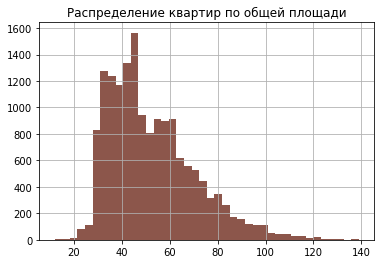

In [80]:
# Построение гистограммы с помощью пакета matplotlib.pyplot
plt.hist(x=df['total_area'], bins=40, color='tab:brown')
plt.title('Распределение квартир по общей площади')
plt.grid(True)
plt.show()

Среди предложений чаще всего встречаются квартиры размером от 30 до 60 метров. Этот размер соответствует площади типичных 1-3 комнатных квартир. Между тем в распределении встречаются 2 пика. Это может означать, что существует 2 типа жилья - например, в Санкт-Петербурге и малых населенных пунктах.

Теперь рассмотрим цену квартир. Также построим гистограмму.

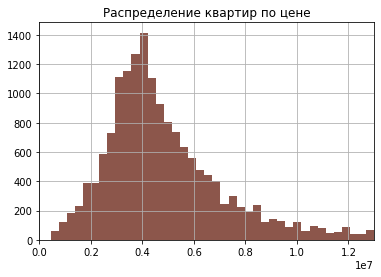

In [81]:
# Построение гистограммы с помощью пакета matplotlib.pyplot

plt.hist(x=df['last_price'],bins=40, color='tab:brown')
plt.title('Распределение квартир по цене')
plt.xlim(0, 13_000_000, 1000000)
plt.grid(True)

plt.show()

Распределение квартир по цене имеет форму, приближенную к форме "колокола", больше всего квартир стоит от 3 до 6 миллионов рублей. 

Теперь рассмотрим количество комнат. Количество комнат - целое число, поэтому вместо гистограммы для анализа мы можем использовать столбчатую диаграмму.

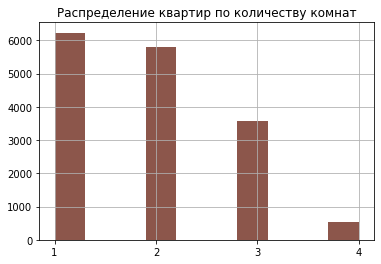

In [82]:
# Построение гистограммы с помощью пакета matplotlib.pyplot

plt.hist(x=df['rooms'], color='tab:brown')
plt.title('Распределение квартир по количеству комнат')
plt.grid(True)
plt.xticks(range(1, 5))

plt.show()

Предложение квартир снижается с ростом количества комнат. Больше всего продается 1- и 2-комнатных квартир.

Оценим высоту потолков в предлагаемом жилье.

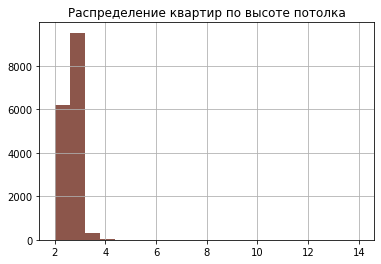

In [83]:
# Построение гистограммы с помощью пакета matplotlib.pyplot
plt.hist(x=df['ceiling_height'], bins=20, color='tab:brown')
plt.title('Распределение квартир по высоте потолка')
plt.grid(True)
plt.show()

Высота потолка в большинстве квартир стандартная -  между 2.5 и 3 метрами.


###### Вывод 1:

Основную массу объявленний представляют стандартные квартиры - от 1 до 4 комнат, с потолками 2,5-3 метра, площадью 30-60 квадратных метров и стоимостью от 3 до 6 миллионов рублей. Необходимо проанализировать, как различные факторы влияют на стоимость этих квартир.

### Время продажи квартир: как долго продается?

Изучим время продажи квартиры. За время продажи примем количество дней показа объявления. 
Для этого построим гистограмму, а также запросим описание столбца, включая среднее и медиану. 

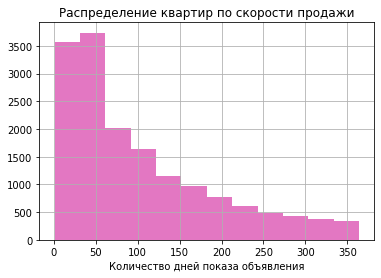

count    16109.000000
mean       103.241728
std         88.815542
min          1.000000
25%         37.000000
50%         72.000000
75%        151.000000
max        364.000000
Name: days_exposition, dtype: float64

In [84]:
# Построение гистограммы с помощью пакета matplotlib.pyplot
plt.hist(x=df['days_exposition'], bins=12, color='tab:pink')
plt.title('Распределение квартир по скорости продажи')
plt.xlabel('Количество дней показа объявления')
plt.grid(True)
plt.show()
df['days_exposition'].describe()

Обычно продажа занимает около 2-3 месяцев. Среднее значение - 103 дня, медиана - 72 дня. 
Можно считать, что продажи прошли очень быстро если продажа заняла меньше 37 дней (первый квартиль), а необычно долго - свыше 151 дня (третий квартиль), это более 5 месяцев.
Мы уже убрали редкие и выбивающиеся значения - [Аномалии days_exposition](#days_exposition_anomalies)
'days_exposition_anomalies'. 
До того, как мы убрали аномалии, за счет некоторых объявлений с долгими сроками демонстрации среднее время продажи состовляло 173 дня, а медиана - 92 дня.


###### Вывод 2:

Мы видим, что многие квартиры продаются в течение первых двух месяцев, а затем идет постепенное снижение количества продаж. Возможно, продавцы, желающие быстрее продать жилье устанавливают более низкие цены и за счет этого продают квартиры быстрее, в то время как более дорогие квартиры продаются дольше. Требуется дополнительное исследование данного вопроса. 

### Факторы, влияющие на стоимость квартиры. От чего зависит цена?

Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. 

Коэффициент корреляции - 0.72


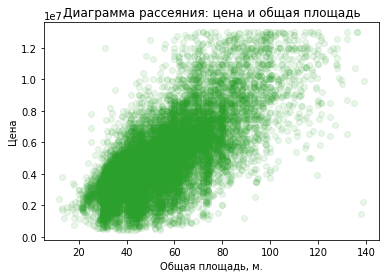

In [85]:
# Построение точечной диаграммы (диаграммы рассеяния)
plt.scatter(x=df['total_area'], y=df['last_price'], alpha = 0.1, color='tab:green')
plt.title('Диаграмма рассеяния: цена и общая площадь')
plt.xlabel('Общая площадь, м.')
plt.ylabel('Цена')
# Показ диаграммы
plt.show
# Рассчет коэффичиента корреляции Пирсона
print('Коэффициент корреляции -', round(df['total_area'].corr(df['last_price']),2))

Коэффициент корреляции Пирсона показывает достаточно высокую силу корреляционной связи. По графику заметно, что квартиры малой площади стоят меьше, чем квартиры большой. Причем для больших квартир связь между ценой и площадью меньше, чем для совсем маленьких.

Коэффициент корреляции - 0.45


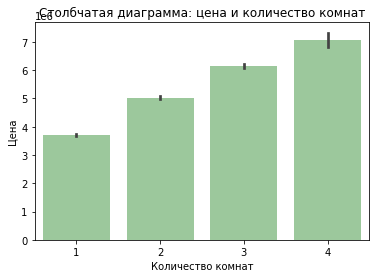

In [86]:
# Построение столбчатой диаграммы
sb.barplot(x=df['rooms'], y=df['last_price'], alpha = 0.5, color='tab:green')
#df.plot(y='rooms', kind='bar')
plt.title('Столбчатая диаграмма: цена и количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
# Показ диаграммы
plt.show
# Рассчет коэффичиента корреляции Пирсона
print('Коэффициент корреляции -', round(df['rooms'].corr(df['last_price']),2))

Между ценой и количеством комнат существует умеренная корреляция. Дешевле всего стоят однокомнатные квартиры, дороже - четырехкомнатные.

Коэффициент корреляции - -0.25


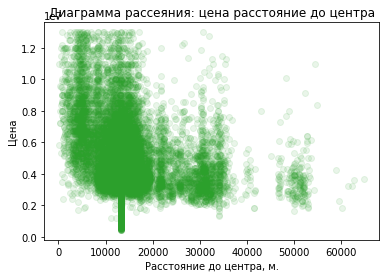

In [87]:
# Построение точечной диаграммы (диаграммы рассеяния)
plt.scatter(x=df['cityCenters_nearest'], y=df['last_price'], alpha = 0.1, color='tab:green')
plt.title('Диаграмма рассеяния: цена расстояние до центра')
plt.xlabel('Расстояние до центра, м.')
plt.ylabel('Цена')
# Показ диаграммы
plt.show
# Рассчет коэффичиента корреляции Пирсона
print('Коэффициент корреляции -', round(df['cityCenters_nearest'].corr(df['last_price']),2))

Мы видим на диаграмме аномалию - в районе 12 000 метров, это связано с тем, что мы заменили отсутствующие данные на медианный показатель для массива. Несмотря на то, что он несколько изменил картину, общая связь понятна: существует умеренная отрицательная корреляция между стоимостью квартиры и расстоянием до центра. Чем меньше расстояние - тем жилье дороже. 

Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. 

<function matplotlib.pyplot.show(close=None, block=None)>

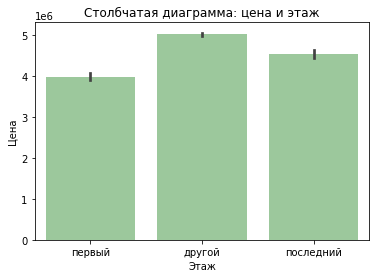

In [88]:
# Построение столбчатой диаграммы
sb.barplot(x=df['floor_category'], y=df['last_price'], alpha = 0.5, color='tab:green')
#df.plot(y='rooms', kind='bar')
plt.title('Столбчатая диаграмма: цена и этаж')
plt.xlabel('Этаж')
plt.ylabel('Цена')
# Показ диаграммы
plt.show

Квартиры на первом этаже продаются дешевле всего. Квартиры на последнем этаже несколько дороже квартир на первом этаже. Дороже всего - квартиры на "средних этажах".

Также изучим зависимость от даты размещения: дня недели, месяца и года.

<function matplotlib.pyplot.show(close=None, block=None)>

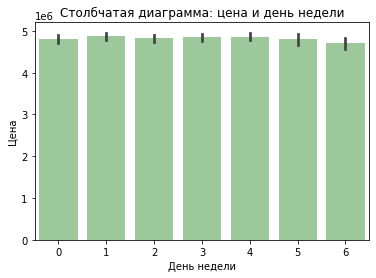

In [89]:
# Построение точечной диаграммы (диаграммы рассеяния)
sb.barplot(x=df['first_day_exposition_weekday'], y=df['last_price'], alpha = 0.5, color='tab:green')
plt.title('Столбчатая диаграмма: цена и день недели')
plt.xlabel('День недели')
plt.ylabel('Цена')
# Показ диаграммы
plt.show

Между днем подачи объявления и ценой квартиры связь практически отсутсвует. Немного дешевле квартиры, объявления о продаже которых подаются в выходные дни - субботу и воскресенье. 

<function matplotlib.pyplot.show(close=None, block=None)>

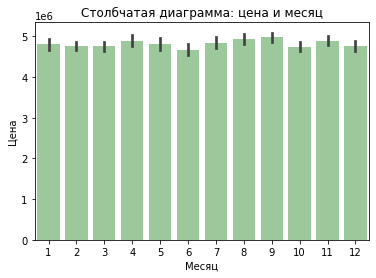

In [90]:
# Построение точечной диаграммы (диаграммы рассеяния)
sb.barplot(x=df['first_day_exposition_month'], y=df['last_price'], alpha = 0.5, color='tab:green')
plt.title('Столбчатая диаграмма: цена и месяц')
plt.xlabel('Месяц')
plt.ylabel('Цена')
# Показ диаграммы
plt.show

Связь между месяцем подачи объявления и ценой квартиры очень слабая. Модно отметить, что дороже всго квартиры стоят в августе, сентябре, а дешевле - в июне. Это может быть связано с рабочи графиком, учебным графиком детей и соответствующим спросом на рынке.

<function matplotlib.pyplot.show(close=None, block=None)>

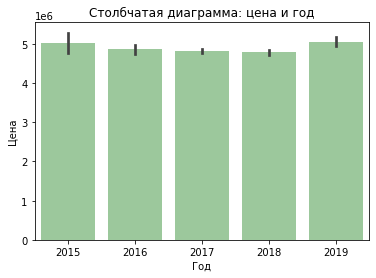

In [91]:
# Построение точечной диаграммы (диаграммы рассеяния)
sb.barplot(x=df['first_day_exposition_year'], y=df['last_price'], alpha = 0.5, color='tab:green')
plt.title('Столбчатая диаграмма: цена и год')
plt.xlabel('Год')
plt.ylabel('Цена')
# Показ диаграммы
plt.show

Динамика изменения цен на квартиры не имеет линейного характера, скорее ее можно описать как цикличную. В 2015 году квартиры стоили несколько больше, в 2016-2018 меньше, а 2019 снова зафиксировал подъем цен.

###### Вывод 3:

Таким образом, сильнее всего на стоимость квартиры влияет общая площадь и количество комнат. Достаточно сильно влияет этаж и близость к центру. Очень слабое влияние имеет время подачи объявления: день недели, месяц и год.

### Факторы, влияющие на стоимость квартиры. Как влияет населенный пункт?

Ситуация на рынке недвижимости разных населенных пунктов может значительно отличаться. Проверим это.

Выберем 10 населённых пунктов с наибольшим числом объявлений. Обратимся для этого к столбцу locality_only_name.

In [92]:
# Создание списка населенных пунктов с наибольшим числом объявлений
top_locality_list = df['locality_only_name'].value_counts().head(10).index
# Показ списка
print(top_locality_list)

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Колпино', 'Парголово', 'Пушкин', 'Гатчина', 'Выборг'],
      dtype='object')


Посчитаем среднюю цену квадратного метра в этих населённых пунктах. 

In [93]:
# Таблица сопряженности: населенные пункты отобранные по условию, расчет числа объявлений и среднего
pivot_avg_meter_price = df.query('locality_only_name in @top_locality_list').pivot_table(values='price_square_meter', index = 'locality_only_name', aggfunc = ['count','mean'])
pivot_avg_meter_price.columns = ('count','mean_price')
pivot_avg_meter_price['mean_price'] = round(pivot_avg_meter_price['mean_price'], 2)
# Показ таблицы
display(pivot_avg_meter_price)

,count,mean_price
locality_only_name,,
Всеволожск,275,66847.69
Выборг,176,57355.42
Гатчина,217,68230.99
Колпино,271,74666.73
Кудрово,366,94456.32
Мурино,460,85361.79
Парголово,254,89109.26
Пушкин,249,100042.53
Санкт-Петербург,10423,104932.22


Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья. 

In [94]:
pivot_avg_meter_price.sort_values(by='mean_price', ascending=False)

,count,mean_price
locality_only_name,,
Санкт-Петербург,10423,104932.22
Пушкин,249,100042.53
Кудрово,366,94456.32
Парголово,254,89109.26
Мурино,460,85361.79
Шушары,356,78024.67
Колпино,271,74666.73
Гатчина,217,68230.99
Всеволожск,275,66847.69


###### Вывод 4:

Самые дорогие квартиры - в городе федерального значения Санкт-Петербурге. Их средняя цена - 104 928 за квадратный метр. Цены в городах Пушкин и Кудрово лишь немного меньше и составляют свыше 99 000 и свыше 94 000 рублей соответственно. Дешевле всего из перечисленных пунктов жилье в Гатчине(около 68 000 за квадратный метр), Всеволжске(около 67 000) и Выборге (около 57 000 рублей). 

### Жилье в центре. Где проходит граница центра?

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). 

In [95]:
# Создадим отдельный датафрейм с объявлениями только из Санкт-Петербурга
df_spb = df.loc[df['locality_name'] == "Санкт-Петербург"]
df_spb.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,days_exposition,living_share,kitchen_share,locality_type,locality_only_name,price_square_meter,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category
1,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,121.0,0.320000,0.410000,город,Санкт-Петербург,100000.00,1,6,2018,другой
4,9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,...,289.0,0.714754,0.106557,город,Санкт-Петербург,88524.59,6,2,2017,другой
5,10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,...,137.0,0.512626,0.214646,город,Санкт-Петербург,127525.25,3,11,2017,другой
9,15,16,4650000.0,39.0,2017-11-18,1,2.60,14,20.5,5,...,19.0,0.525641,0.194872,город,Санкт-Петербург,119230.77,5,11,2017,другой
10,18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,...,168.0,0.625806,0.180645,город,Санкт-Петербург,104838.71,4,1,2017,другой


Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. 

In [96]:
df_spb['center_km'] = round(df_spb['cityCenters_nearest'] / 1000)
df_spb.head()

/tmp/ipykernel_14019/2315724790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spb['center_km'] = round(df_spb['cityCenters_nearest'] / 1000)


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,living_share,kitchen_share,locality_type,locality_only_name,price_square_meter,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,center_km
1,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,0.320000,0.410000,город,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
4,9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,...,0.714754,0.106557,город,Санкт-Петербург,88524.59,6,2,2017,другой,15.0
5,10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,...,0.512626,0.214646,город,Санкт-Петербург,127525.25,3,11,2017,другой,14.0
9,15,16,4650000.0,39.0,2017-11-18,1,2.60,14,20.5,5,...,0.525641,0.194872,город,Санкт-Петербург,119230.77,5,11,2017,другой,14.0
10,18,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,...,0.625806,0.180645,город,Санкт-Петербург,104838.71,4,1,2017,другой,11.0


После этого посчитаем среднюю цену для каждого километра. 

In [97]:
pivot_spb_km = df_spb.pivot_table(index=['center_km'],
                               values='price_square_meter',
                               aggfunc='mean')
# pivot_purpose.reset_index(inplace=True)

pivot_spb_km

,price_square_meter
center_km,
0.0,106421.474286
1.0,121960.264286
2.0,118126.132240
3.0,109366.160556
4.0,117101.301587
5.0,122278.712790
6.0,122975.590703
7.0,116116.884529
8.0,114074.191222


Построим график: он должен показывать, как цена зависит от удалённости от центра. 

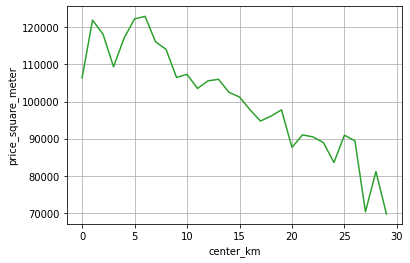

In [98]:
sb.lineplot(x=pivot_spb_km.index, y = pivot_spb_km['price_square_meter'], color='tab:red')
plt.grid()

Определим границу, где график сильно меняется, — это и будет центральная зона. На нашем графике - это отметка 8  километров. После нее цена идет вниз. 

###### Вывод 5:

Таким образом, 8 километров вокруг центра - это центральная зона. Жилье в ней может отличаться от остального жилья в культурной столице.

### Жилье в центре. Чем отличается этот сегмент квартир от остальных?

Выделим сегмент квартир в центре. 

In [99]:
df_spb_center = df_spb.query('center_km <= 8')
print('Всего квартир в центре', df_spb_center['center_km'].count())
df_spb_center.head()

Всего квартир в центре 1980


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,living_share,kitchen_share,locality_type,locality_only_name,price_square_meter,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,center_km
1,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,...,0.320000,0.410000,город,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
14,24,8,6500000.0,97.2,2015-10-31,2,2.77,3,46.5,1,...,0.478395,0.201646,город,Санкт-Петербург,66872.43,5,10,2015,первый,2.0
48,70,9,3400000.0,30.0,2018-09-05,1,2.55,5,16.0,1,...,0.533333,0.233333,город,Санкт-Петербург,113333.33,2,9,2018,первый,8.0
63,94,3,3500000.0,29.5,2019-04-26,1,2.50,5,15.6,2,...,0.528814,0.186441,город,Санкт-Петербург,118644.07,4,4,2019,другой,7.0
66,99,32,9600000.0,90.0,2017-09-26,4,2.55,5,67.0,2,...,0.744444,0.088889,город,Санкт-Петербург,106666.67,1,9,2017,другой,3.0


Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

Коэффициент корреляции - 0.72


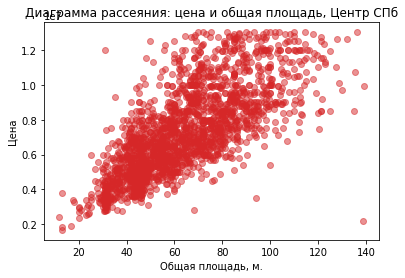

In [106]:
# Построение точечной диаграммы (диаграммы рассеяния)
plt.scatter(x=df_spb_center['total_area'], y=df_spb_center['last_price'], alpha = 0.5, color='tab:red')
plt.title('Диаграмма рассеяния: цена и общая площадь, Центр СПб')
plt.xlabel('Общая площадь, м.')
plt.ylabel('Цена')
# Показ диаграммы
plt.show
# Рассчет коэффичиента корреляции Пирсона
print('Коэффициент корреляции -', round(df_spb_center['total_area'].corr(df_spb_center['last_price']),2))

Коэффициент корреляции Пирсона показывает достаточно высокую силу корреляционной связи. По графику заметно, что квартиры малой площади стоят меьше, чем квартиры большой. Связь между площадью и ценой приобретает более линейный характер. 

Коэффициент корреляции - 0.47


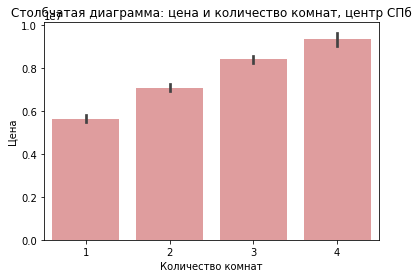

In [105]:
# Построение столбчатой диаграммы
sb.barplot(x=df_spb_center['rooms'], y=df_spb_center['last_price'], alpha = 0.5, color='tab:red')
#df.plot(y='rooms', kind='bar')
plt.title('Столбчатая диаграмма: цена и количество комнат, центр СПб')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
# Показ диаграммы
plt.show
# Рассчет коэффичиента корреляции Пирсона
print('Коэффициент корреляции -', round(df_spb_center['rooms'].corr(df_spb_center['last_price']),2))

Между ценой и количеством комнат существует заметная корреляция. Естественно, что общая логика сохраняется: дешевле всего стоят однокомнатные квартиры, дороже - четырехкомнатные.

Коэффициент корреляции - 0.2


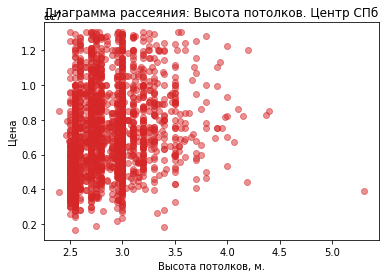

In [109]:
# Построение точечной диаграммы (диаграммы рассеяния)
plt.scatter(x=df_spb_center['ceiling_height'], y=df_spb_center['last_price'], alpha = 0.5, color='tab:red')
plt.title('Диаграмма рассеяния: Высота потолков. Центр СПб')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Цена')
# Показ диаграммы
plt.show
# Рассчет коэффичиента корреляции Пирсона
print('Коэффициент корреляции -', round(df_spb_center['ceiling_height'].corr(df_spb_center['last_price']),2))

Между ценой и высотой потолков взаимосвязь слабая - высокие потолки могут быть в старых домах ращличного технического состояния.

Также выделим факторы, которые влияют на стоимость квартиры (этаж, удалённость от центра, дата размещения объявления). 

<function matplotlib.pyplot.show(close=None, block=None)>

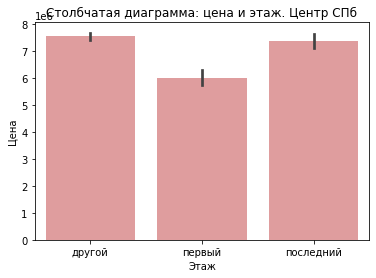

In [111]:
# Построение столбчатой диаграммы
sb.barplot(x=df_spb_center['floor_category'], y=df_spb_center['last_price'], alpha = 0.5, color='tab:red')
#df.plot(y='rooms', kind='bar')
plt.title('Столбчатая диаграмма: цена и этаж. Центр СПб')
plt.xlabel('Этаж')
plt.ylabel('Цена')
# Показ диаграммы
plt.show

В центре Санкт-Петербурга отличается только цена на квартиры на первом этаже. Средние и последние этажи пользуются одинаковым спросом. 

Коэффициент корреляции - -0.17


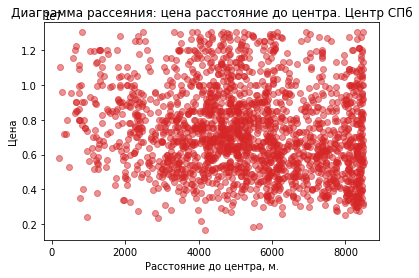

In [115]:
# Построение точечной диаграммы (диаграммы рассеяния)
plt.scatter(x=df_spb_center['cityCenters_nearest'], y=df_spb_center['last_price'], alpha = 0.5, color='tab:red')
plt.title('Диаграмма рассеяния: цена расстояние до центра. Центр СПб')
plt.xlabel('Расстояние до центра, м.')
plt.ylabel('Цена')
# Показ диаграммы
plt.show
# Рассчет коэффичиента корреляции Пирсона
print('Коэффициент корреляции -', round(df_spb_center['cityCenters_nearest'].corr(df_spb_center['last_price']),2))

Внутри центральной зоны связь с близостью к физическому центру - слабо отрицательная. Это может быть связано с тем, что здесь уже все квартиры расположены в удобной транспортной доступности и привлекательными являются конкретные микрорайоны.

<function matplotlib.pyplot.show(close=None, block=None)>

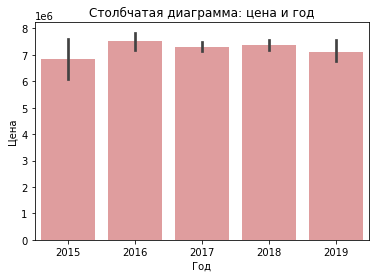

In [117]:
# Построение точечной диаграммы (диаграммы рассеяния)
sb.barplot(x=df_spb_center['first_day_exposition_year'], y=df_spb_center['last_price'], alpha = 0.5, color='tab:red')
plt.title('Столбчатая диаграмма: цена и год')
plt.xlabel('Год')
plt.ylabel('Цена')
# Показ диаграммы
plt.show

Сегмент квартир в центре характеризуется стабильно высоким уровнем цен. Если цены на все жилье в 2016-2018 годах несколько снижались, то квартиры в центре сохраняли высокую стоимость.

###### Вывод 6:

Сделаем выводы. Центральный сегмент квартир города Санкт-Петербурга отличается от основной базы объявлений в Ленинградской области. Квартиры там значительно дороже. Большее влияние имеет количество комнат. 
Меньшее влияние на цену имеют последний этаж (эта проблема скорее многоэтажной застройки), расстояние до центра (в самом центре районы различаются по привлекательности и практически все обладают хорошей транспортной доступностью).
Эти выводы несколько отличаются от выводов по всей базе, однако и общие тенденции есть: площадь и количество комнат влияют на цену положительно, первый этаж - отрицательно. 

## Общий вывод:

Мы провели исследование по определению параметров для автоматического определения рыночной стоимости объектов недвижимости.
Для определения рыночной стоимости объектов недвижимости ряд факторов имеет существенное значение: населенный пункт,общая площадь, количество комнат имеют положительное влияние, расстояние до центра имеет отрицательное влияние. Ряд факторов имеет среднее значеие: нахождение на первом, последнем этаже, высота потолков. Слабое значение имеет месяц подачи объявления, не влияет день недели.

